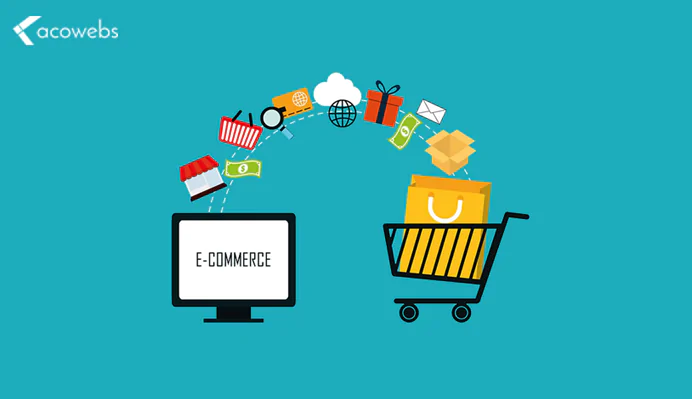

Kiosk, an e-commerce company tasked us with analyzing their 2023/24 sales dataset and provide with simple actionable insights that will help them:

   
   1. Understand user preferences
   
   2. Understand user behaviors
  
   3. Optimize shopping experience
   
   4. Enhance customer satisfaction
   
   5. Drive business growth through data-driven insights.
    
 And we accepted the task! Below is an analysis of their datasets and insights deduced from them.

In [1]:
#import all necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the datasets into dataframes for calling and analysis
df1=pd.read_csv('C:\\Users\\raymo\\Downloads\\e-commerce\\customer_details.csv')
df2=pd.read_csv('C:\\Users\\raymo\\Downloads\\e-commerce\\product_interaction.csv')

**DATA PREPARATION**

In [5]:
#check the attributes of the dataframes
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

df1 has no missing values and has no fields for conversion thus ready for analysis

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3294 entries, 0 to 3293
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user id           2999 non-null   float64
 1   product id        2999 non-null   object 
 2   Interaction type  2871 non-null   object 
 3   Time stamp        2999 non-null   object 
 4   Unnamed: 4        0 non-null      float64
dtypes: float64(2), object(3)
memory usage: 128.8+ KB


df1 and df2 have different number of rows so we might have a problem merging them.
Let's first check the null values in df1

In [8]:
df1.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [9]:
df2.isnull().sum()

user id              295
product id           295
Interaction type     423
Time stamp           295
Unnamed: 4          3294
dtype: int64

In [10]:
#glimpse at df1
df1.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


**DATA ANALYSIS**

In [12]:
df1.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


From the descriptive analysis we deduce that:
   
   1. Mean and middle age of our users is 44 years, youngest user is 18 yrs while the eldest at 70 years!
   
   2. Mean price for our products is $59, the cheapest at 20 and the most expensive at 100
  
   3. Highest possible rating is 5, mean rate point is 3.7 where as the lowest rate point is 2.5.
   
   4. Most average previous purchases amongst our users is 25, maximum previous purchases from a user is 50 and the least             being 1.

1. Age

In [15]:
#get unique ages
df1['Age'].unique()

array([55, 19, 50, 21, 45, 46, 63, 27, 26, 57, 53, 30, 61, 65, 64, 25, 52,
       66, 31, 56, 18, 38, 54, 33, 36, 35, 29, 70, 69, 67, 20, 39, 42, 68,
       49, 59, 47, 40, 41, 48, 22, 24, 44, 37, 58, 32, 62, 51, 28, 43, 34,
       23, 60], dtype=int64)

In [22]:
#get most & least popular age
most_popular_age = df1['Age'].mode().values[0]
print("The most popular age among customers is:", most_popular_age)

The most popular age among customers is: 69


In [24]:
least_popular_age = df1['Age'].value_counts().idxmin()
print("The least popular age among customers is:", least_popular_age)

The least popular age among customers is: 44


In [26]:
#get age that generated most revenues 
revenues_by_age=df1.groupby('Age')['Purchase Amount (USD)'].sum()

age_with_most_revenues=revenues_by_age.idxmax()

highest_revenue=revenues_by_age.max()

print(f'Age group {age_with_most_revenues} generated highest revenues at ${highest_revenue}')

Age group 49 generated highest revenues at $5552


In [27]:
#get age that generated least revenues
age_with_least_revenues=revenues_by_age.idxmin()
least_revenue=revenues_by_age.min()
print(f'Age group {age_with_least_revenues} generated least revenues at ${least_revenue}')

Age group 67 generated least revenues at $3258


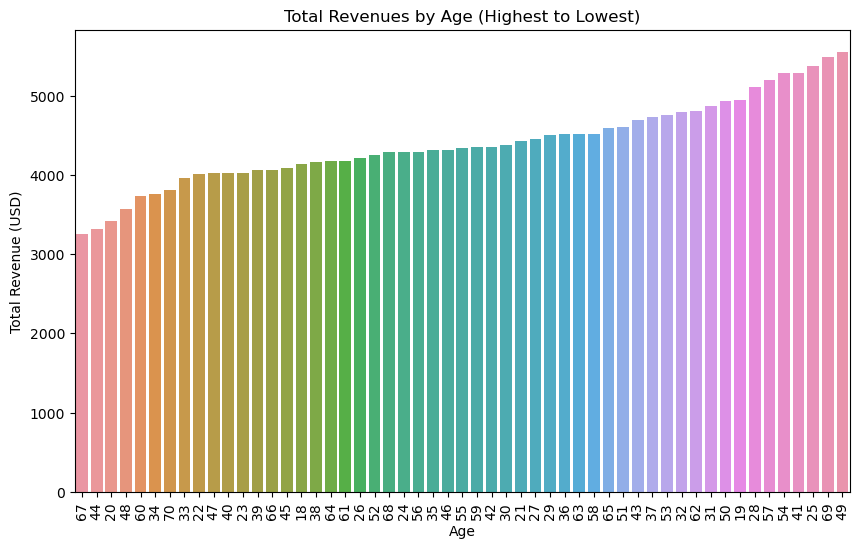

In [29]:
#plot the results for clarification
revenues_by_age=df1.groupby('Age')['Purchase Amount (USD)'].sum().reset_index()
revenues_by_age=revenues_by_age.sort_values(by='Purchase Amount (USD)')

plt.figure(figsize=(10, 6))
sns.barplot(data=revenues_by_age, x='Age', y='Purchase Amount (USD)', order=revenues_by_age['Age'])
plt.title('Total Revenues by Age (Highest to Lowest)')
plt.xlabel('Age')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=90)
plt.show()

2. Item purchased

In [30]:
df1['Item Purchased'].unique()

array(['Blouse', 'Sweater', 'Jeans', 'Sandals', 'Sneakers', 'Shirt',
       'Shorts', 'Coat', 'Handbag', 'Shoes', 'Dress', 'Skirt',
       'Sunglasses', 'Pants', 'Jacket', 'Hoodie', 'Jewelry', 'T-shirt',
       'Scarf', 'Hat', 'Socks', 'Backpack', 'Belt', 'Boots', 'Gloves'],
      dtype=object)

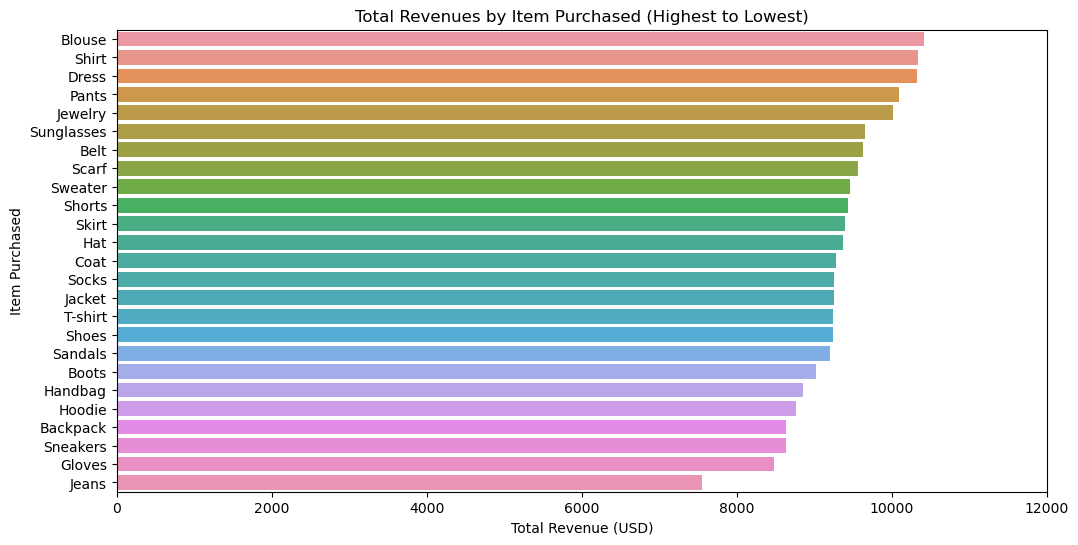

In [39]:
#get revenues generated by each item
revenues_by_item = df1.groupby('Item Purchased')['Purchase Amount (USD)'].sum().reset_index()

# Sort the DataFrame by total revenue in descending order
revenues_by_item = revenues_by_item.sort_values(by='Purchase Amount (USD)', ascending=False)

# Plot the data using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(data=revenues_by_item, x='Purchase Amount (USD)', y='Item Purchased', order=revenues_by_item['Item Purchased'])
plt.title('Total Revenues by Item Purchased (Highest to Lowest)')
plt.xlabel('Total Revenue (USD)')
plt.xlim(0,12000)
plt.ylabel('Item Purchased')
plt.show()

In [40]:
revenues_by_item.head(5)

,Item Purchased,Purchase Amount (USD)
2,Blouse,10410
16,Shirt,10332
5,Dress,10320
13,Pants,10090
12,Jewelry,10010


In [41]:
revenues_by_item.tail()

,Item Purchased,Purchase Amount (USD)
9,Hoodie,8767
0,Backpack,8636
20,Sneakers,8635
6,Gloves,8477
11,Jeans,7548


The best selling attires are mostly worn by women and the least selling being unisex.

In [42]:
#get frequency of sale for each item
item_sales_frequency = df1['Item Purchased'].value_counts()
item_sales_frequency.head()

Blouse     171
Jewelry    171
Pants      171
Shirt      169
Dress      166
Name: Item Purchased, dtype: int64

In [43]:
item_sales_frequency.tail()

Sneakers    145
Boots       144
Backpack    143
Gloves      140
Jeans       124
Name: Item Purchased, dtype: int64

Sneakers, Backpack, Gloves & Jeans are the slowest movin and they also generated the least revenues.

Solutions to improve their performance should be designed such as promotions, marketing.
The best selling items also happened to be the highest grossing.

3. Categories

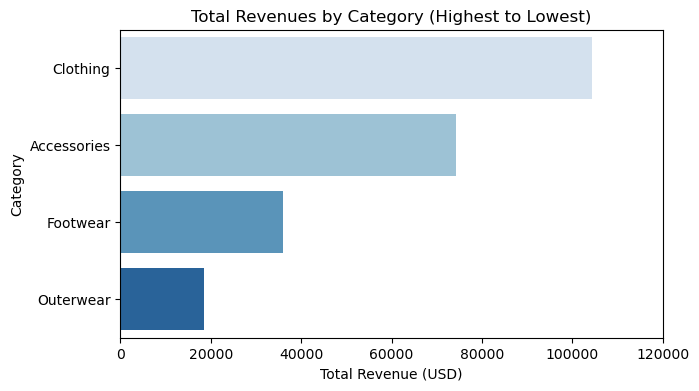

In [49]:
#get category with most revenues
categories_by_item = df1.groupby('Category')['Purchase Amount (USD)'].sum().reset_index()
categories_by_item = categories_by_item.sort_values(by='Purchase Amount (USD)', ascending=False)

plt.figure(figsize=(7, 4))
sns.barplot(data=categories_by_item, x='Purchase Amount (USD)', y='Category', order=categories_by_item['Category'], palette='Blues')
plt.title('Total Revenues by Category (Highest to Lowest)')
plt.xlabel('Total Revenue (USD)')
plt.xlim(0,120000)
plt.ylabel('Category')
plt.show()

In [50]:
categories_by_item

,Category,Purchase Amount (USD)
1,Clothing,104264
0,Accessories,74200
2,Footwear,36093
3,Outerwear,18524


Clothing by far is the best selling category where as outwear lags far behind

In [52]:
category_sales_frequency = df1['Category'].value_counts()
category_sales_frequency

Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: Category, dtype: int64

Categories sales frequency is similar to its revenues ranking.

3. Location

In [62]:
#get location with most customers to help us enhance our logistics
location_by_customers = df1.groupby('Location')['Customer ID'].sum().reset_index()
location_by_customers = location_by_customers.sort_values(by='Customer ID', ascending=False)

In [59]:
location_by_customers.head()

,Location,Customer ID
25,Montana,197055
11,Idaho,191380
12,Illinois,185614
4,California,183680
0,Alabama,173989


In [60]:
location_by_customers.tail()

,Location,Customer ID
20,Massachusetts,128446
8,Florida,128056
38,Rhode Island,125759
14,Iowa,118705
10,Hawaii,114343


Montaa and Idaho have the majority of our customers where as Hawaii and Iowa have the least numbers of customers.

This insight is very crucial as Kiosk can increase delivery trucks or warehouses around the areas with most customers to optimize delivery time.

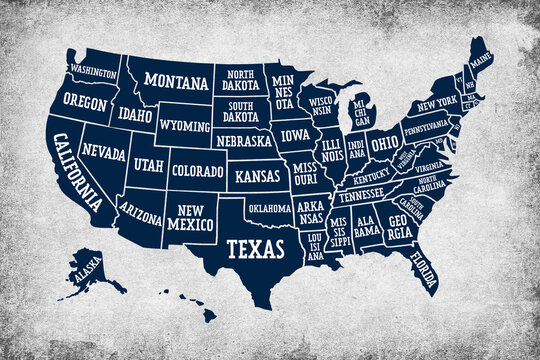

In [63]:
#get locations with highest/lowest revenues
location_by_revenues = df1.groupby('Location')['Purchase Amount (USD)'].sum().reset_index()
location_by_revenues = location_by_revenues.sort_values(by='Purchase Amount (USD)', ascending=False)

In [64]:
#below are the highest grossing states
#location_by_revenues.head()

,Location,Purchase Amount (USD)
25,Montana,5784
12,Illinois,5617
4,California,5605
11,Idaho,5587
27,Nevada,5514


In [65]:
#below are the lowest grossing states
location_by_revenues.tail()

,Location,Purchase Amount (USD)
38,Rhode Island,3871
29,New Jersey,3802
8,Florida,3798
10,Hawaii,3752
15,Kansas,3437


In [20]:
#let's get the locations that bought the most during the period, crucial aspect for logistic  planning
short_turnover_by_location = df1.groupby('Location')['Item Purchased'].size().reset_index()
short_turnover_by_location = short_turnover_by_location.sort_values(by='Item Purchased', ascending=False)
short_turnover_by_location.head(5)

,Location,Item Purchased
25,Montana,96
4,California,95
11,Idaho,93
12,Illinois,92
0,Alabama,89


In [21]:
#the following locations bought least items in the period 
short_turnover_by_location.tail(5)

,Location,Item Purchased
29,New Jersey,67
2,Arizona,65
10,Hawaii,65
15,Kansas,63
38,Rhode Island,63


With the addition of Nevada, states with the most customers generated the most revenues as well, where as NJ ad KS join the other low customer count states with low revenues.

Items move **fastest** in these locations: MT, CA, ID & AL which also generate great revenues.

Where as Items move **slowest** in these locations:NJ, AR, HI, KS & RI, which also generate the least revenues.

4. Size

In [67]:
#get unique values of field Size
df1['Size'].unique()

array(['L', 'S', 'M', 'XL'], dtype=object)

In [68]:
#deduce sales frequency of each size
size_frequency = df1.groupby('Size').size().reset_index(name='Frequency')
size_frequency = size_frequency.sort_values(by='Frequency', ascending=False)
size_frequency

,Size,Frequency
1,M,1755
0,L,1053
2,S,663
3,XL,429


Most selling size is Medium by far followed by Large.
XL has very low sales.

In [17]:
#get best/least selling size per item
size_counts = df1.groupby(['Item Purchased', 'Size']).size().reset_index(name='Count')
# Arrange the results in a table using pivot
pivot_table = size_counts.pivot(index='Item Purchased', columns='Size', values='Count').fillna(0)

pivot_table

Size,L,M,S,XL
Item Purchased,,,,
Backpack,35,76,18,14
Belt,39,66,37,19
Blouse,46,75,29,21
Boots,40,70,21,13
Coat,45,66,36,14
Dress,47,77,27,15
Gloves,35,66,22,17
Handbag,34,72,29,18
Hat,41,67,23,23


The **medium** size is the best seller across all items

In Shirts and sneakers, XL sells more than S

In Hats, XL sells equally as S

5. Season

In [78]:
#get the different seasons in our dataset
df1['Season'].unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [79]:
#get revenues generated for every season
season_by_revenues = df1.groupby('Season')['Purchase Amount (USD)'].sum().reset_index()
season_by_revenues = season_by_revenues.sort_values(by='Purchase Amount (USD)', ascending=False)
season_by_revenues

,Season,Purchase Amount (USD)
0,Fall,60018
1,Spring,58679
3,Winter,58607
2,Summer,55777


In fall season, Kiosk generated the most revenues with summer generating the least.
In Fall people generally prepare for winter thus the high sales margin.

In [3]:
#get the best selling item for each season 
best_selling_items_per_season = df1.groupby('Season')['Item Purchased'].max().reset_index()
best_selling_items_per_season

,Season,Item Purchased
0,Fall,T-shirt
1,Spring,T-shirt
2,Summer,T-shirt
3,Winter,T-shirt


In [7]:
#get the least selling item per season
least_selling_items_per_season = df1.groupby('Season')['Item Purchased'].min().reset_index()
least_selling_items_per_season

,Season,Item Purchased
0,Fall,Backpack
1,Spring,Backpack
2,Summer,Backpack
3,Winter,Backpack


In [15]:
#get number of items sold per season
number_of_items_sold_per_season = df1.groupby('Season')['Item Purchased'].size().reset_index()
number_of_items_sold_per_season

,Season,Item Purchased
0,Fall,975
1,Spring,999
2,Summer,955
3,Winter,971


Kiosk clears most of its stock during Spring and has the least turn over period during summer.

T-shirts are best sellers across all seasons where as backpacks are the slowest movers across all seasons.

6. Rating

In [50]:
#get item with the best ratings
#4 is our mark for a good rating
high_rating = df1[df1['Review Rating']>4]
items_count = high_rating['Item Purchased'].value_counts().reset_index()
items_count.head(5)

,index,Item Purchased
0,Sandals,71
1,Jewelry,69
2,Jacket,65
3,Gloves,64
4,Belt,63


Sandals have the most good ratings in the dataset

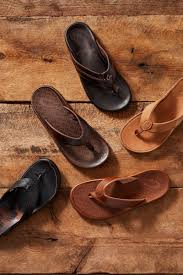

In [48]:
#get item with the most bad ratings 
# <2.6 is our mark for negative ratings
low_rating = df1[df1['Review Rating']<2.6]
item_count = low_rating['Item Purchased'].value_counts().reset_index()
item_count.head()

,index,Item Purchased
0,Jacket,5
1,Belt,5
2,Gloves,5
3,Sneakers,4
4,Skirt,4


Jackets have the most bad ratings amongst all items

In [ ]:
7. Colors

In [54]:
#get color with the most good ratings
high_rating = df1[df1['Review Rating']>4]
high_rating_color_count = high_rating['Color'].value_counts().reset_index()
high_rating_color_count.head()

,index,Color
0,Gray,78
1,Yellow,78
2,Black,69
3,Maroon,66
4,Magenta,65


The gray color has the best ratings,it can be used on the front display followed by yellow as we have some data-driven confidence this will increase sales

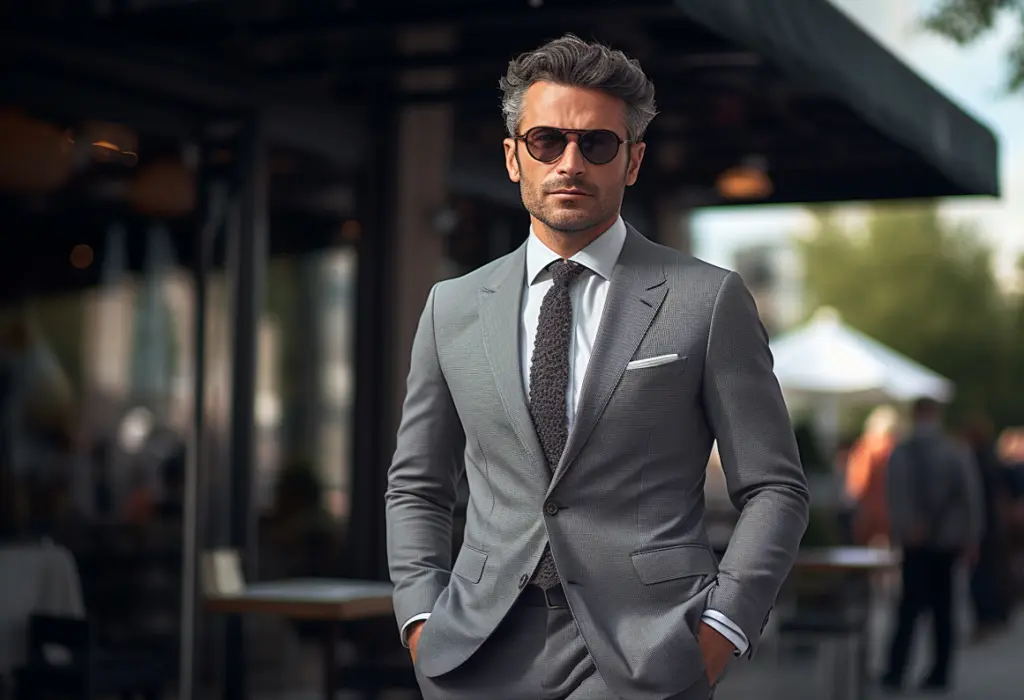

In [58]:
#get color with most bad ratings
low_rating = df1[df1['Review Rating']<2.6]
low_rating_color_count = low_rating['Color'].value_counts().reset_index()
low_rating_color_count.head()

,index,Color
0,Blue,7
1,Violet,6
2,Black,5
3,Charcoal,4
4,Brown,4


In [62]:
#get color that sold most, might be used mostly in display
highest_selling_color = df1['Color'].value_counts().reset_index()
highest_selling_color.head()

,index,Color
0,Olive,177
1,Yellow,174
2,Silver,173
3,Teal,172
4,Green,169


**Color Olive** was the  most dominant color amongst sold items.


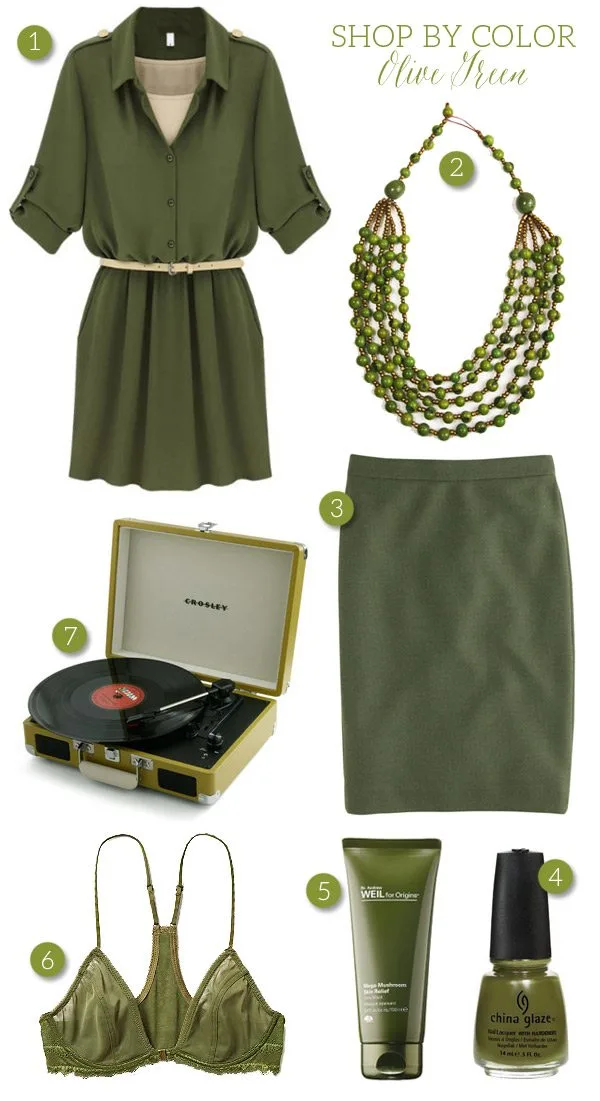

The Yellow color dominates in ratings and sales thus a promising color if displayed amongst gray and olive

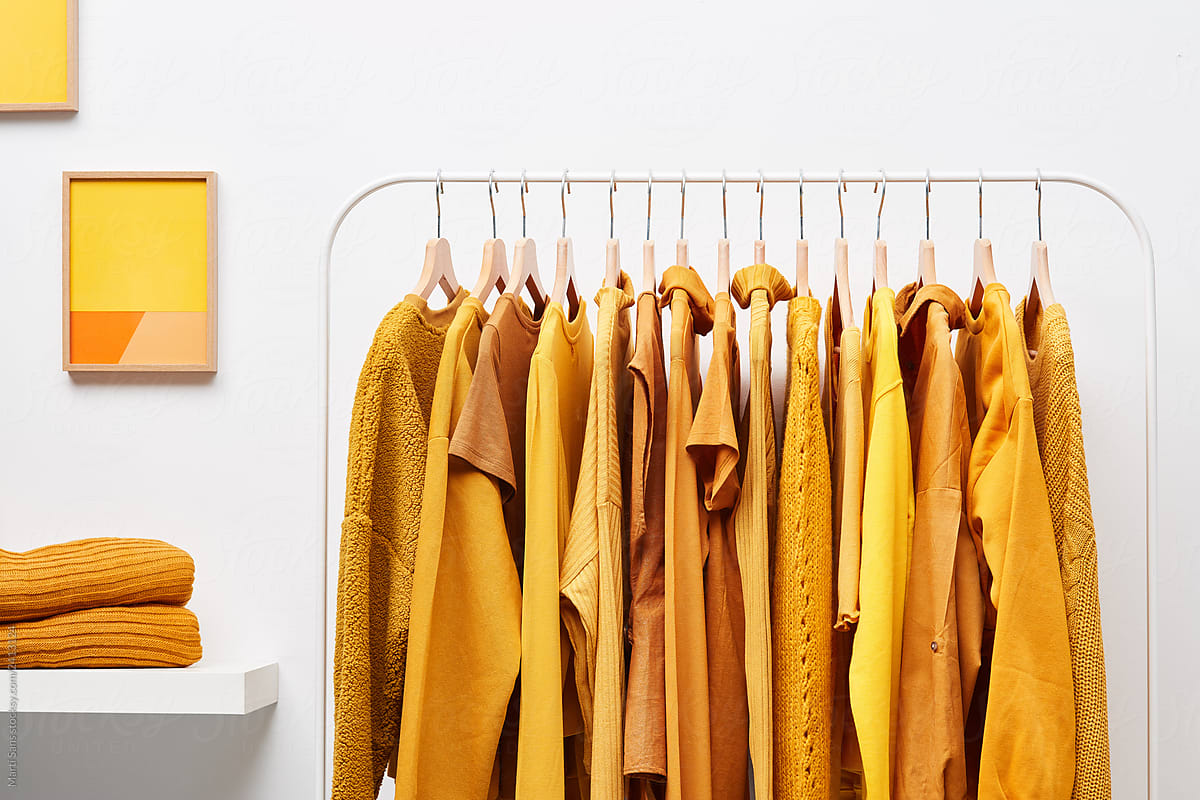

In [64]:
lowest_selling_color = highest_selling_color.tail()
lowest_selling_color

,index,Color
20,Lavender,147
21,Turquoise,145
22,White,142
23,Brown,141
24,Gold,138


8. Subscriptions.

In [69]:
df1['Subscription Status'].unique()

array(['Yes', 'No'], dtype=object)

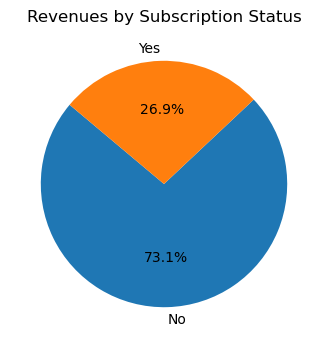

In [72]:
#get how much revenues were earned from all revenues
subscription_revenues = df1.groupby('Subscription Status')['Purchase Amount (USD)'].sum().reset_index()
# Filter the data for 'Yes' and 'No' subscriptions
filtered_data = df1[df1['Subscription Status'].isin(['Yes', 'No'])]

# Calculate the sum of 'Purchase Amount (USD)' for each subscription status
subscription_revenues = filtered_data.groupby('Subscription Status')['Purchase Amount (USD)'].sum()

# Plot
plt.figure(figsize=(4, 4))
plt.pie(subscription_revenues, labels=subscription_revenues.index, autopct='%1.1f%%', startangle=140)
plt.title('Revenues by Subscription Status')
plt.show()

Revenues from Unsubscribed users is by far very high compared to Subscribed users.
Perhaps Kiosk should innovate attractive incentives to increase subscribers.

In [74]:
#get the number of customers from each group
subscription_count = df1.groupby('Subscription Status')['Customer ID'].size().reset_index()
subscription_count

,Subscription Status,Customer ID
0,No,2847
1,Yes,1053


In [101]:
#get ages of the subscribers to help us in targeted marketing
#start with most subscribed ages
subscribed_customers = df1[df1['Subscription Status']=='Yes']
subscribed_customers_by_age = subscribed_customers['Age'].value_counts().reset_index()
subscribed_customers_by_age.head()

,index,Age
0,64,28
1,54,28
2,55,27
3,50,27
4,43,26


Ages 64 & 54 are our highest subscribers.
This metric reflects on alot e.g., financial flexibility and priority on convenience.

Kiosk should have more personalised incentives to drive more numbers into subscription plans.

In [102]:
#get age sets with low numbersin subscription
subscribed_customers_by_age.tail()

,index,Age
48,39,14
49,18,14
50,60,13
51,44,11
52,23,10


From the look of it, Kiosk should drive these 13 customers in age group '60' and the 11 aged 44 into subscription.

9. Discounts

In [92]:
#compare the number of discounted goods sold
discounted_goods_count = df1['Discount Applied'].value_counts().reset_index()
discounted_goods_count 

,index,Discount Applied
0,No,2223
1,Yes,1677


Most of the items are not discounted.

In [85]:
revenues_from_discount_type = df1.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()
revenues_from_discount_type

,Discount Applied,Purchase Amount (USD)
0,No,133670
1,Yes,99411


Revenues from non-discounted goods are higher than those from discounted by far. The primary goal for discounts is to drive sales and this seems not to have been the case here.
57.3% of revenues were from non-discounted goods

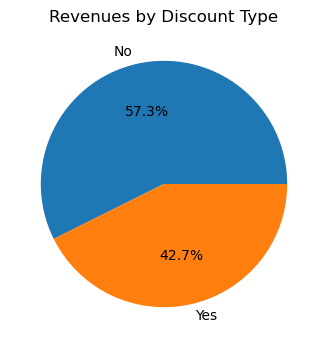

In [97]:
# Filter the DataFrame to include only 'Yes' and 'No' in 'Discount Applied' column
filtered_df = df1[df1['Discount Applied'].isin(['Yes', 'No'])]

# Group the filtered data by 'Discount Applied' and calculate the total purchase amount
revenues_from_discount_type = filtered_df.groupby('Discount Applied')['Purchase Amount (USD)'].sum().reset_index()

# Plot the results as a pie chart
plt.figure(figsize=(4, 4))
plt.pie(revenues_from_discount_type['Purchase Amount (USD)'], labels=revenues_from_discount_type['Discount Applied'], autopct='%1.1f%%')
plt.title('Revenues by Discount Type')
plt.show()

In [103]:
discounted_items = df1[df1['Discount Applied']=='Yes']
items_by_number_of_discounts = discounted_items['Item Purchased'].value_counts().reset_index()
items_by_number_of_discounts.head()

,index,Item Purchased
0,Pants,81
1,Coat,79
2,Sweater,79
3,Hat,77
4,Jewelry,76


In [104]:
items_by_number_of_discounts.tail()

,index,Item Purchased
20,Gloves,60
21,Sandals,59
22,Blouse,58
23,Jeans,57
24,Socks,52


Jeans and gloves should perhaps have more discounts as they have the lowest sales.

Sandals and Blouse could be natural sellers with or without discount.

10. Payment method

In [110]:
#get the various types of payment methods
payment_methods = df1['Payment Method'].unique()


In [111]:
#get income from each payment method to see customer preference 
payment_methods_by_revenues = df1.groupby('Payment Method')['Purchase Amount (USD)'].sum().reset_index()
payment_methods_by_revenues = payment_methods_by_revenues.sort_values(by='Purchase Amount (USD)',ascending=False)
payment_methods_by_revenues

,Payment Method,Purchase Amount (USD)
2,Credit Card,40310
4,PayPal,40109
1,Cash,40002
3,Debit Card,38742
5,Venmo,37374
0,Bank Transfer,36544


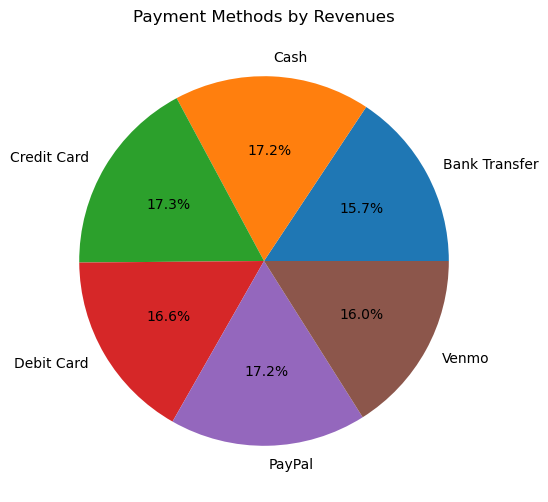

In [113]:
#plot the results for visualization
selected_methods = ['Venmo', 'Credit Card', 'PayPal', 'Cash', 'Debit Card', 'Bank Transfer']
filtered_df = df1[df1['Payment Method'].isin(selected_methods)]
payment_methods_by_revenues = filtered_df.groupby('Payment Method')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(6, 6))                                                                                                                                                                             ))
plt.pie(payment_methods_by_revenues, labels=payment_methods_by_revenues.index, autopct='%1.1f%%')
plt.title('Payment Methods by Revenues')
plt.show()

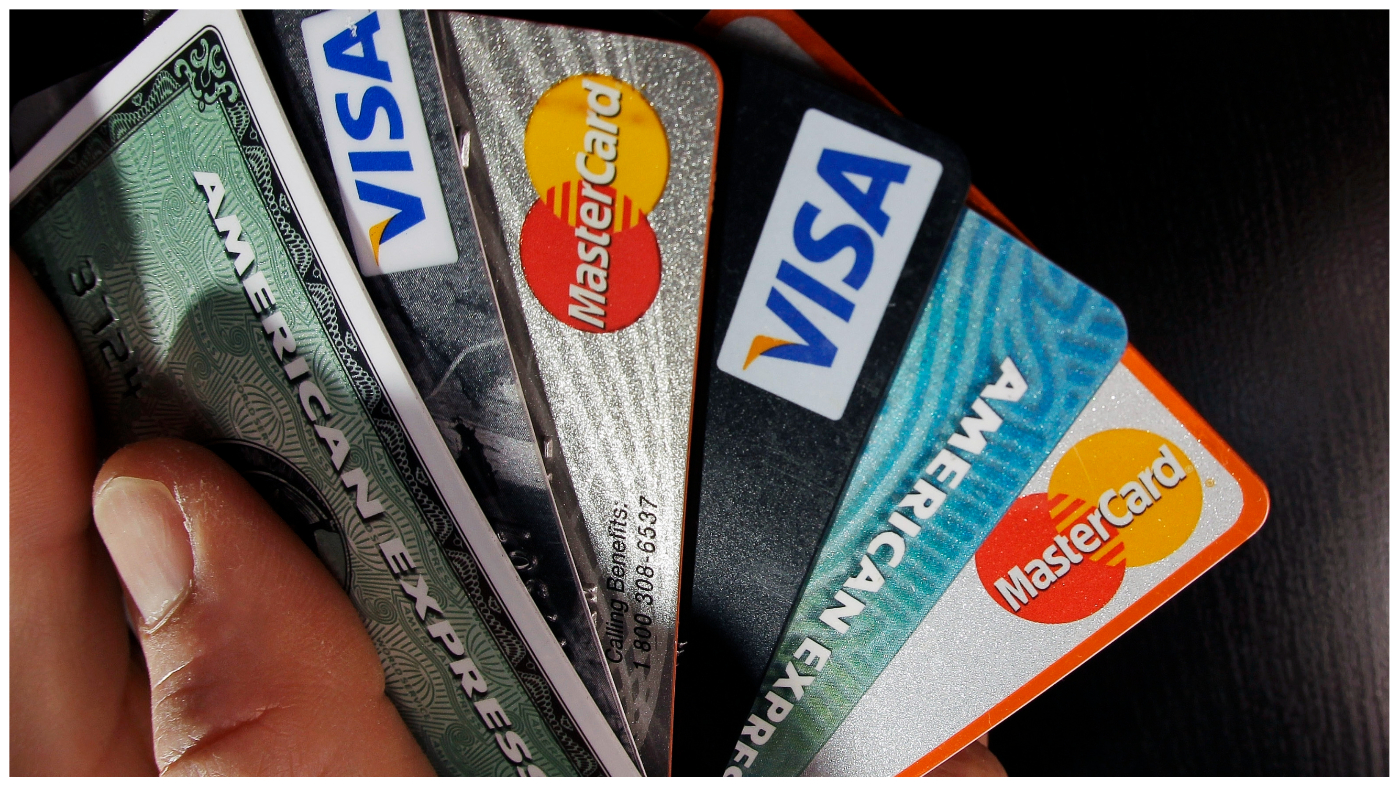

From the results above, 
Kiosk should prioritize enhancing the compatibility of payments made via Credit Card,PayPal	for more and increased customer convenience.

Cash payment as well should be made easier to do as it raked high amounts of revenues as well.

Kiosk could plan on necessary incentives incase they want to migrate numbers to a certain method which is more convenient.

11. Frequency of Purchases

In [114]:
#get the different frequencies
df1['Frequency of Purchases'].unique()

array(['Fortnightly', 'Weekly', 'Annually', 'Quarterly', 'Bi-Weekly',
       'Monthly', 'Every 3 Months'], dtype=object)

In [117]:
#get the frequency with its number of users
frequency_by_users = df1['Frequency of Purchases'].value_counts().reset_index()
frequency_by_users

,index,Frequency of Purchases
0,Every 3 Months,584
1,Annually,572
2,Quarterly,563
3,Monthly,553
4,Bi-Weekly,547
5,Fortnightly,542
6,Weekly,539


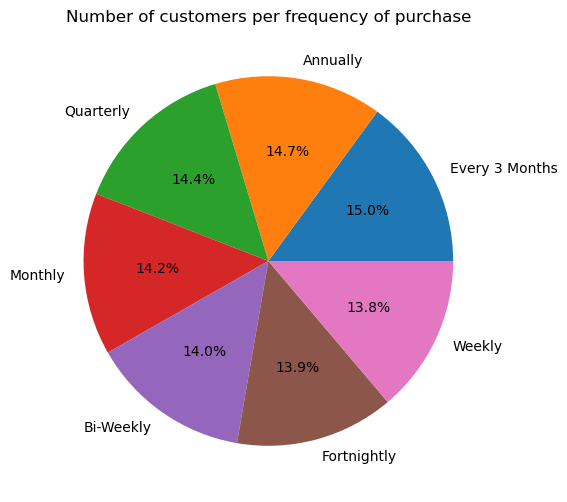

In [124]:
frequency = ['Every 3 Months', 'Annually', 'Quarterly', 'Monthly', 'Bi-Weekly', 'Fortnightly','Weekly']
filtered_df = df1[df1['Frequency of Purchases'].isin(frequency)]
frequency = filtered_df['Frequency of Purchases'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(frequency, labels=frequency.index, autopct='%1.1f%%')
plt.title('Number of customers per frequency of purchase')
plt.show()

Many of our customers make a purchase once in every three months and very few of them make a purchase weekly.

The data above is crucial in inventory management and targeted marketing as Kiosk can reach a customer when their anticipated purchase time nears.

This helps increase chances of a sale.
Inventory wise, Kiosk can anticipate a period that purchases will surge e.g., end-month.

A phase marketing can be improvised to move customers from annually to quartely to increase through discounts honored if customer purchases during that period.

In [118]:
#get revenues earned from each frequency 
revenue_by_frequency = df1.groupby('Frequency of Purchases')['Purchase Amount (USD)'].sum().reset_index()
revenue_by_frequency

,Frequency of Purchases,Purchase Amount (USD)
0,Annually,34419
1,Bi-Weekly,33200
2,Every 3 Months,35088
3,Fortnightly,32007
4,Monthly,32810
5,Quarterly,33771
6,Weekly,31786


Customers who make a purchase once in an year spend a lot of money on the website. Kiosk can be prepared for them and when the period looms, recommend attractive discounts to maximize on their huge spending.

The margin differences are not that big thus easier to swing some numbers to one side.

12. Shipping Type

In [144]:
#get the different shipping methods used and number of customers using each channel
customers_by_shipping_methods = df1.groupby('Shipping Type')['Customer ID'].size().reset_index()
customers_by_shipping_methods = customers_by_shipping_methods.sort_values(by='Customer ID', ascending=False)
customers_by_shipping_methods

,Shipping Type,Customer ID
2,Free Shipping,675
4,Standard,654
5,Store Pickup,650
3,Next Day Air,648
1,Express,646
0,2-Day Shipping,627


Customers tended to avoid the 2-Day shipping and leant towards Free Shipping.

Free Shipping has the most customers by far proving its likeability.

A good number of customers preferred Standard and Store pickup as well

**CONCLUSION**

Done on analysing df1, we will list the insights on our **Readme** file answering all the business problems. 

However there is another df2 which consists of customer interactions with Kiosk's app. We will analyze it on a separate notebook as it has different busiess insights from df1.